In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [103]:
mmrd_df = pd.read_csv('./MMR-maternal-deaths-and-LTR_MMEIG-trends_2000-2017_Revised-2021.csv')

In [104]:
mmrd_df.head()

,ISO Code,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,AFG,Afghanistan,1450,1390,1300,1240,1180,1140,1120,1090,1030,993,954,905,858,810,786,701,673,638
1,ALB,Albania,23,23,21,21,18,22,18,19,20,20,21,22,17,16,16,15,16,15
2,DZA,Algeria,161,155,148,145,134,127,122,119,117,117,115,116,116,115,114,114,113,112
3,AGO,Angola,827,766,690,628,574,519,473,431,395,359,326,300,281,269,258,251,246,241
4,ATG,Antigua and Barbuda,44,44,43,44,41,40,46,48,50,45,44,43,44,43,42,43,43,42


In [115]:
mmr_yvalues[0]

array([1450, 1390, 1300, 1240, 1180, 1140, 1120, 1090, 1030,  993,  954,
        905,  858,  810,  786,  701,  673,  638])

In [173]:
mmr_yvalues[0]/mmrd_df[mmrd_df['Country']=='United States'].iloc[:,2:].to_numpy()[0]
# a[-1]

array([30.47368421, 33.10526316, 35.05263158, 35.78947368, 36.10526316,
       36.05263158, 35.78947368, 35.31578947, 34.57894737, 33.26315789,
       31.47368421, 29.31578947, 27.78947368, 26.78947368, 26.        ,
       25.26315789, 24.63157895, 24.10526316])

In [167]:
a

array([48.25      , 48.38461538, 51.23076923, 52.30769231, 52.76923077,
       52.69230769, 48.57142857, 47.92857143, 46.92857143, 42.13333333,
       39.86666667, 37.13333333, 33.        , 31.8125    , 30.875     ,
       26.66666667, 24.63157895, 24.10526316])

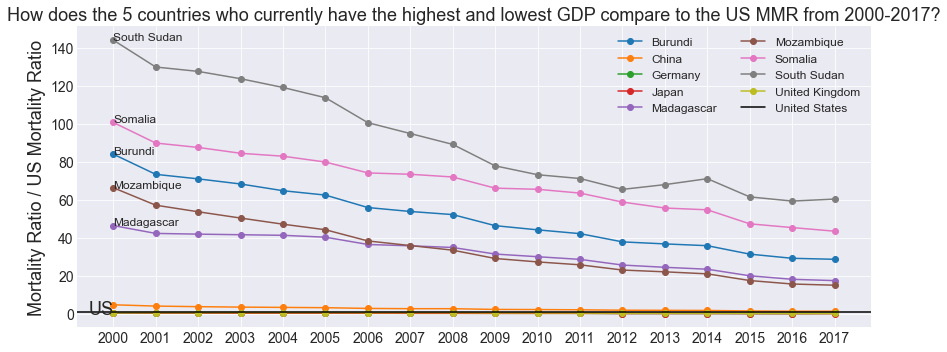

In [282]:
plt.style.use('seaborn-darkgrid')
years_list = []
for col in mmrd_df[mmrd_df['Country']=='Afghanistan'].iloc[:,2:]:
    years_list.append(col)
    # print(col)
plt.figure(figsize = (12,5))
for country in mmrd_df['Country']:
    # country_list.append(country)
    df_row = mmrd_df.loc[mmrd_df['Country']=='{}'.format(country)]
    mmr_yvalues = mmrd_df[mmrd_df['Country']==country].iloc[:,2:].to_numpy()
    if country in ['China', 'Japan', 'Germany', 'United Kingdom']:
        mmr_by_US_ydata = mmr_yvalues[0]/mmrd_df[mmrd_df['Country']=='United States'].iloc[:,2:].to_numpy()[0]
        plt.plot(years_list, mmr_by_US_ydata, marker='o', label=country)
        
        # plt.text('2006',mmr_by_US_ydata[6], country, horizontalalignment='left')
    elif country in ['Burundi', 'South Sudan', 'Somalia', 'Mozambique', 'Madagascar']:
        mmr_by_US_ydata = mmr_yvalues[0]/mmrd_df[mmrd_df['Country']=='United States'].iloc[:,2:].to_numpy()[0]
        plt.plot(years_list, mmr_by_US_ydata, marker='o', label=country)
        plt.text('2000',mmr_by_US_ydata[0], country, horizontalalignment='left', fontsize=12)

plt.axhline(y=1.0, color='black', label='United States')
plt.ylabel('Mortality Ratio / US Mortality Ratio', fontsize=18)
plt.text(0, 0, 'US', horizontalalignment='right', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="upper right", fontsize=12, ncol=2)
plt.title('How does the 5 countries who currently have the highest and lowest GDP compare to the US MMR from 2000-2017?', fontsize=18)
plt.tight_layout()
plt.savefig('./a2_deceptive.png', dpi=200)


In [259]:
years_floats = list(np.float_(years_list))
years_floats

[2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0]

In [262]:
slope, intercept, r_value, p_value, std_err = linregress(mmr_yvalues[0], years_floats)
print(slope, intercept, r_value, p_value, std_err)

-0.05212518801996826 2039.3610071516 -0.8195793068722469 3.150739605367817e-05 0.009110145781519394


Burundi, -0.03531331112998951
China, -0.5684728294815742
Germany, -4.6397515527950315
India, -0.07198088618592528
Japan, -4.119305856832973
Madagascar, -0.0684056165973782
Mozambique, -0.032693133691566824
Somalia, -0.04714976664855077
South Sudan, -0.020162279039700408
United States, 2.4017595307917894


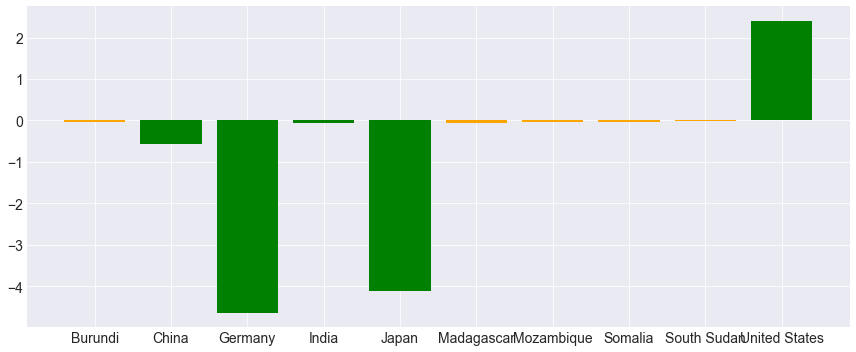

In [274]:
plt.style.use('seaborn-darkgrid')
years_list = []
for col in mmrd_df[mmrd_df['Country']=='Afghanistan'].iloc[:,2:]:
    years_list.append(col)
    # print(col)
plt.figure(figsize = (12,5))
country_list = [] 
slope_list = []
for country in mmrd_df['Country']:
    # country_list.append(country)
    df_row = mmrd_df.loc[mmrd_df['Country']=='{}'.format(country)]
    mmr_yvalues = mmrd_df[mmrd_df['Country']==country].iloc[:,2:].to_numpy()
    if country in ['United States','China', 'Japan', 'Germany', 'India']:
        slope, intercept, r_value, p_value, std_err = linregress(mmr_yvalues[0], years_floats)
        print('{}, {}'.format(country,slope))
        plt.bar(country,slope, color='green')
        country_list.append(country)
        slope_list.append(slope)
        # mmr_by_US_ydata = mmr_yvalues[0]/mmrd_df[mmrd_df['Country']=='United States'].iloc[:,2:].to_numpy()[0]
        # plt.plot(years_list, mmr_by_US_ydata, marker='o', label=country)
        
        # plt.text('2006',mmr_by_US_ydata[6], country, horizontalalignment='left')
    elif country in ['Burundi', 'South Sudan', 'Somalia', 'Mozambique', 'Madagascar']:
        slope, intercept, r_value, p_value, std_err = linregress(mmr_yvalues[0], years_floats)
        print('{}, {}'.format(country,slope))
        plt.bar(country,slope, color='orange')
        country_list.append(country)
        slope_list.append(slope)
        # mmr_by_US_ydata = mmr_yvalues[0]/mmrd_df[mmrd_df['Country']=='United States'].iloc[:,2:].to_numpy()[0]
        # plt.plot(years_list, mmr_by_US_ydata, marker='o', label=country)
        # plt.text('2000',mmr_by_US_ydata[0], country, horizontalalignment='left', fontsize=12)

# plt.axhline(y=1.0, color='black')
# plt.ylabel('Country Mortality Ratio / US Mortality Ratio', fontsize=18)
# plt.text(0, 0, 'US', horizontalalignment='left', fontsize=18)

# plt.legend(loc="upper right", fontsize=12, ncol=2)


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('./a2_earnest.jpeg')


# Make Dataframe
country_mmr_slope_df = pd.DataFrame()
country_mmr_slope_df['Country'] = country_list
country_mmr_slope_df['slope'] = slope_list
country_mmr_slope_df.to_csv('./country_mmr_slope_df.csv')




In [ ]:
country_2000_mmr = []

country_list = []
for country in mmrd_df['Country']:
    country_list.append(country)
    df_row = mmrd_df.loc[mmrd_df['Country']=='{}'.format(country)]

In [56]:
# plt.figure(figsize=(5,15))
# sns.scatterplot(data=mmrd_df, x='2000', y='Country')
# sns.scatterplot(data=mmrd_df, x='2001', y='Country')
# plt.tight_layout()

In [74]:
df

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,1450,1390,1300,1240,1180,1140,1120,1090,1030,993,954,905,858,810,786,701,673,638


In [85]:

df
# df.iloc[0]

# sns.scatterplot(data=country_mmr_data, x='Country', y='Afghanistan')

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,1450,1390,1300,1240,1180,1140,1120,1090,1030,993,954,905,858,810,786,701,673,638


In [ ]:
plt.figure(figsize=(5,15))
sns.scatterplot(data=mmrd_df, x='2000', y='Country')
plt.tight_layout()

In [55]:

    # print(df_row['Country'], df_row['2000'])
    # country_annual_mmr.append(df_row['2000'])

0    Afghanistan
Name: Country, dtype: object 0    1450
Name: 2000, dtype: int64
1    Albania
Name: Country, dtype: object 1    23
Name: 2000, dtype: int64
2    Algeria
Name: Country, dtype: object 2    161
Name: 2000, dtype: int64
3    Angola
Name: Country, dtype: object 3    827
Name: 2000, dtype: int64
4    Antigua and Barbuda
Name: Country, dtype: object 4    44
Name: 2000, dtype: int64
5    Argentina
Name: Country, dtype: object 5    66
Name: 2000, dtype: int64
6    Armenia
Name: Country, dtype: object 6    43
Name: 2000, dtype: int64
7    Australia
Name: Country, dtype: object 7    7
Name: 2000, dtype: int64
8    Austria
Name: Country, dtype: object 8    6
Name: 2000, dtype: int64
9    Azerbaijan
Name: Country, dtype: object 9    47
Name: 2000, dtype: int64
10    Bahamas
Name: Country, dtype: object 10    75
Name: 2000, dtype: int64
11    Bahrain
Name: Country, dtype: object 11    27
Name: 2000, dtype: int64
12    Bangladesh
Name: Country, dtype: object 12    434
Name: 2000, dtyp

In [52]:
country_annual_mmr

[0    1450
 Name: 2000, dtype: int64,
 1    23
 Name: 2000, dtype: int64,
 2    161
 Name: 2000, dtype: int64,
 3    827
 Name: 2000, dtype: int64,
 4    44
 Name: 2000, dtype: int64,
 5    66
 Name: 2000, dtype: int64,
 6    43
 Name: 2000, dtype: int64,
 7    7
 Name: 2000, dtype: int64,
 8    6
 Name: 2000, dtype: int64,
 9    47
 Name: 2000, dtype: int64,
 10    75
 Name: 2000, dtype: int64,
 11    27
 Name: 2000, dtype: int64,
 12    434
 Name: 2000, dtype: int64,
 13    50
 Name: 2000, dtype: int64,
 14    22
 Name: 2000, dtype: int64,
 15    8
 Name: 2000, dtype: int64,
 16    89
 Name: 2000, dtype: int64,
 17    520
 Name: 2000, dtype: int64,
 18    423
 Name: 2000, dtype: int64,
 19    331
 Name: 2000, dtype: int64,
 20    17
 Name: 2000, dtype: int64,
 21    262
 Name: 2000, dtype: int64,
 22    69
 Name: 2000, dtype: int64,
 23    28
 Name: 2000, dtype: int64,
 24    19
 Name: 2000, dtype: int64,
 25    516
 Name: 2000, dtype: int64,
 26    1010
 Name: 2000, dtype: int64,
 2